In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-electric-vehicle-sales-data-2010-2024/Global EV Data 2024.csv


# Data Preparation

In [2]:
import pandas as pd


In [3]:
ev_data = pd.read_csv('/kaggle/input/global-electric-vehicle-sales-data-2010-2024/Global EV Data 2024.csv')
ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


# Clean the Data:

In [4]:
# Check for missing values
ev_data.isnull().sum()

# Optionally, drop or fill missing values
ev_data = ev_data.dropna() 

**Ensure Data Consistency**

In [5]:
# Check for inconsistent data in categorical columns
print(ev_data['region'].unique())
print(ev_data['category'].unique())
print(ev_data['parameter'].unique())
print(ev_data['powertrain'].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
['Historical' 'Projection-STEPS' 'Projection-APS']
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']


**Filter Relevant Data:**

In [6]:
# Focus on specific regions, years, or powertrains if necessary
# Example: Filter data for the years 2015 onwards
ev_data = ev_data[ev_data['year'] >= 2015]


# Market Share Calculation

**Calculate Total Market Size for Each Region and Year:**

In [7]:
# Group the data by region and year to calculate total market size
total_market_size = ev_data.groupby(['region', 'year'])['value'].sum().reset_index()
total_market_size.rename(columns={'value': 'total_market_size'}, inplace=True)

# Merge the total market size back into the original dataset
ev_data = pd.merge(ev_data, total_market_size, on=['region', 'year'])


**Calculate Market Share**

In [8]:
# Calculate the market share for each entry
ev_data['market_share'] = (ev_data['value'] / ev_data['total_market_size']) * 100

# Display the updated dataset
print(ev_data.head())


      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars       PHEV  2015  Vehicles   
1  Australia  Historical        EV stock  Cars       PHEV  2015  Vehicles   
2  Australia  Historical  EV stock share  Cars         EV  2015   percent   
3  Australia  Historical  EV sales share  Cars         EV  2015   percent   
4  Australia  Historical        EV sales  Cars        BEV  2015  Vehicles   

      value  total_market_size  market_share  
0  1000.000           5360.227     18.655926  
1  2100.000           5360.227     39.177445  
2     0.027           5360.227      0.000504  
3     0.200           5360.227      0.003731  
4   760.000           5360.227     14.178504  


#  Regional Comparison

**Compare Market Shares Across Regions**

In [9]:
# Pivot the data to compare market shares across regions
market_share_pivot = ev_data.pivot_table(index='year', columns='region', values='market_share')

# Display the pivoted data
print(market_share_pivot.head())


region  Australia    Austria   Belgium     Brazil   Bulgaria    Canada  Chile  \
year                                                                            
2015    16.666667  10.000000  5.263158  10.000000  50.000000  4.761905   12.5   
2016    16.666667  11.111111  4.545455  10.000000  33.333333  5.882353   12.5   
2017    12.500000  10.000000  4.347826   8.333333  33.333333  5.882353   12.5   
2018    12.500000  10.000000  4.000000   5.000000  33.333333  4.761905   12.5   
2019    14.285714  10.000000  4.166667   5.000000  33.333333  5.000000   12.5   

region     China   Colombia  Costa Rica  ...  South Africa     Spain  \
year                                     ...                           
2015    2.857143  33.333333   33.333333  ...     16.666667  7.142857   
2016    2.777778  33.333333   33.333333  ...     16.666667  6.250000   
2017    2.631579  33.333333   33.333333  ...     12.500000  5.000000   
2018    2.564103  33.333333   33.333333  ...     12.500000  5.000000   


**Analyze Trends and Outliers**

In [10]:
# Describe the data to find trends and outliers
market_share_summary = market_share_pivot.describe()
print(market_share_summary)



region  Australia    Austria   Belgium     Brazil   Bulgaria    Canada  \
count    9.000000   9.000000  9.000000   9.000000   9.000000  9.000000   
mean    12.989418  10.123457  4.082344   6.215415  37.037037  4.879193   
std      2.685470   0.370370  0.572236   2.483672   7.349309  0.626590   
min     10.000000  10.000000  3.571429   4.166667  33.333333  4.166667   
25%     10.000000  10.000000  3.571429   4.545455  33.333333  4.347826   
50%     12.500000  10.000000  4.000000   5.000000  33.333333  4.761905   
75%     14.285714  10.000000  4.347826   8.333333  33.333333  5.000000   
max     16.666667  11.111111  5.263158  10.000000  50.000000  5.882353   

region      Chile      China   Colombia  Costa Rica  ...  South Africa  \
count    9.000000  12.000000   9.000000    9.000000  ...      9.000000   
mean    11.790123   1.621341  33.333333   33.333333  ...     12.716049   
std      1.112075   0.918315   0.000000    0.000000  ...      2.468075   
min     10.000000   0.724638  33.3333

# Visualization

**Create Bar Charts**

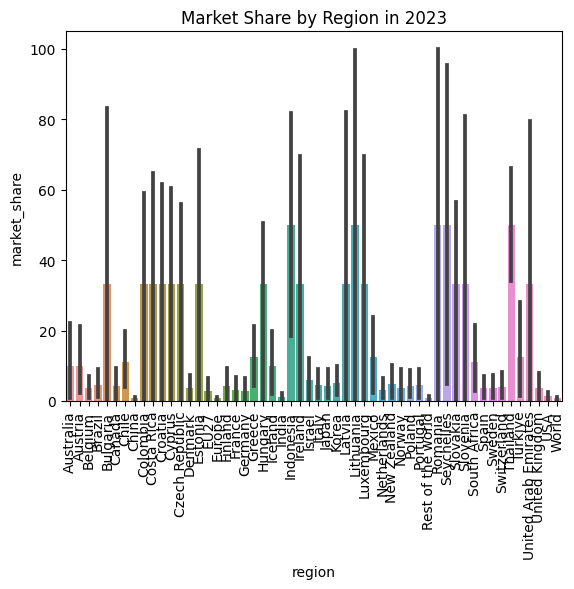

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Bar chart for a specific year
sns.barplot(x='region', y='market_share', data=ev_data[ev_data['year'] == 2023])
plt.title('Market Share by Region in 2023')
plt.xticks(rotation=90)
plt.show()


**Create Heatmaps**

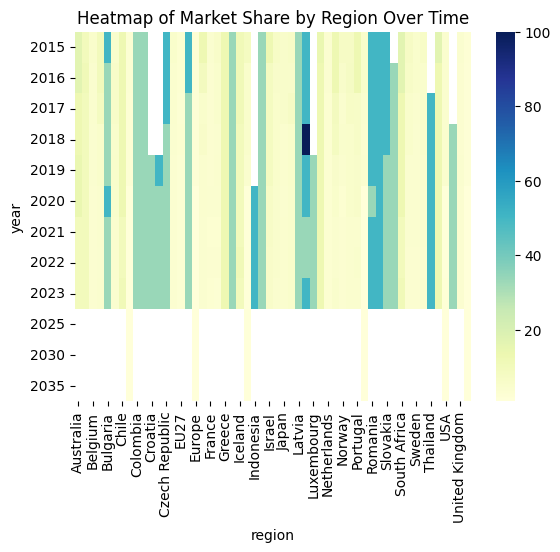

In [12]:
# Heatmap of market share over time for different regions
sns.heatmap(market_share_pivot, cmap="YlGnBu")
plt.title('Heatmap of Market Share by Region Over Time')
plt.show()


# Create Geospatial Maps

/tmp/ipykernel_19/4160940760.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


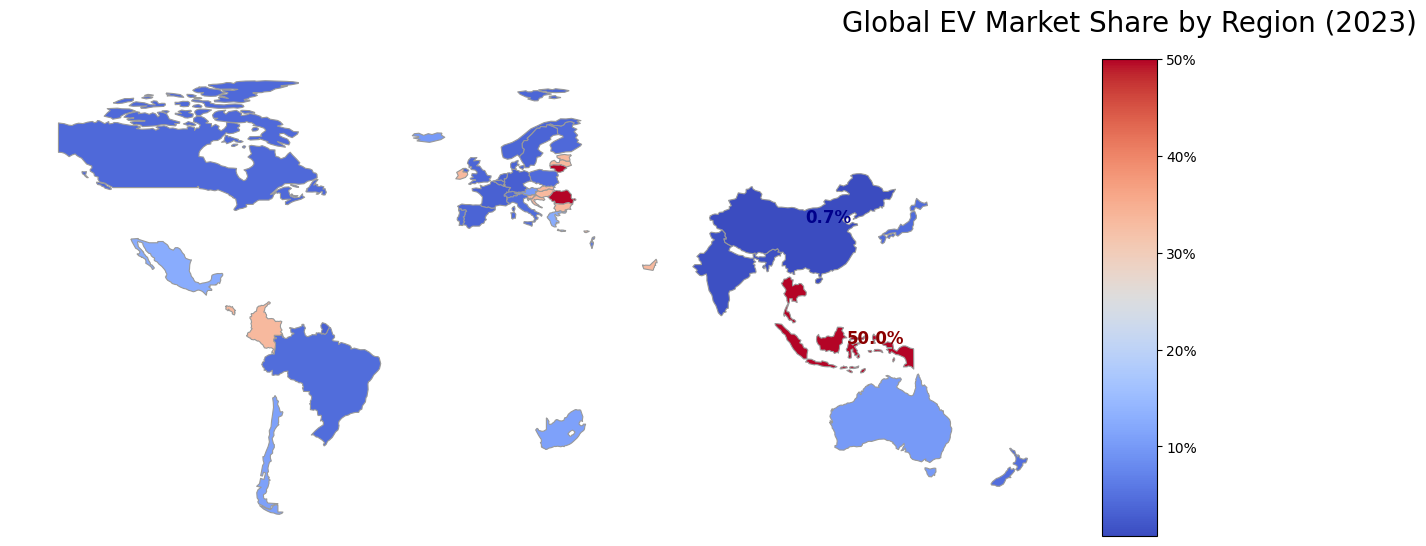

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Step 1: Load the World Map using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 2: Load the EV Data
# Replace with your actual CSV file path
# ev_data = pd.read_csv('Global EV Data 2024.csv')

# Example data preparation (if not done already)
# Here, we assume 'region', 'year', and 'market_share' are columns in your dataset
# Calculate the average market share for each region for the year 2023
ev_data_avg = ev_data[ev_data['year'] == 2023].groupby('region')['market_share'].mean().reset_index()

# Step 3: Merge the Data
# Merge the world map GeoDataFrame with the EV data
merged_data = world.set_index('name').join(ev_data_avg.set_index('region'))

# Drop any rows with missing market share data (if needed)
merged_data = merged_data.dropna(subset=['market_share'])

# Step 4: Create a Customized Geospatial Map
# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the data with a colormap and edge colors for better distinction
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the map using a custom colormap
merged_data.plot(column='market_share', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.6', legend=True, cax=cax)

# Enhance the legend
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}%'))
cax.tick_params(labelsize=10)

# Add title and labels
plt.title('Global EV Market Share by Region (2023)', fontsize=20, pad=20)
ax.set_axis_off()  # Remove the axis for a cleaner look

# Add annotations for regions with the highest and lowest market shares (Optional)
for idx, row in merged_data.iterrows():
    if row['market_share'] == merged_data['market_share'].max():
        ax.annotate(f"{row['market_share']:.1f}%", xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    xytext=(3, 3), textcoords="offset points", fontsize=12, color='darkred', weight='bold')
    if row['market_share'] == merged_data['market_share'].min():
        ax.annotate(f"{row['market_share']:.1f}%", xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    xytext=(3, 3), textcoords="offset points", fontsize=12, color='darkblue', weight='bold')

# Show the plot
plt.show()


# Strategic Insights

In [14]:
# Summarize key insights from the data
# For example, regions with the highest and lowest market shares
top_regions = ev_data.groupby('region')['market_share'].mean().sort_values(ascending=False)
print("Top regions by average market share:")
print(top_regions.head())

# Offer strategic recommendations based on the analysis
# Example: Focus on increasing EV infrastructure in regions with high potential but low current market share


Top regions by average market share:
region
Indonesia     50.000000
Seychelles    50.000000
Thailand      50.000000
Romania       47.368421
Lithuania     47.368421
Name: market_share, dtype: float64
